In [ ]:
# import benodigde modules
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/jrgommers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Functie om gegevens te laden uit een tekstbestand
def load_data(file_path):
    with open (file_path, "r", encoding="utf-8") as f:
        text = f.read()
    sentences = text.split("\n")

    data = [sentence for sentence in sentences if len(sentence.split()) >= 10]

    return data

In [ ]:
# Functie om tekst voor te bewerken naar nodige indeling
def preprocess_sentence(sentence,stop_words):
    sentence = re.sub(r"[\/.,'\":;()]","",sentence)
    words = sentence.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

stop_words = set(stopwords.words("dutch"))


In [ ]:
# Verwerk elke zin in de lijst 'data' door de preprocess_sentence functie toe te passen.
# De stopwoorden worden daarbij verwijderd.
def process_data(data,stop_words):
    processed = [preprocess_sentence(sentence, stop_words) for sentence in data]
    return processed

In [ ]:
file_path ="/homes/jrgommers/year 3/Deel_B/kanker-wiki.txt"
data = load_data(file_path)

corpus = process_data(data, stop_words)
# Genereer een unieke vocabulaire (set van unieke woorden) uit het corpus
#voeg alles samen en splits ze op in losse woorden
vocab = set(" ".join(corpus).split())

print(f"Aantal unieke woorden:{len(vocab)}")

Aantal unieke woorden:889


In [ ]:
def create_pairs(corpus, w_size):
    X = []
    y = []

    for sentence in corpus:
        words = sentence.split()
    # Itereer door de woorden in de zin, met een offset van w_size aan beide zijden
        for index in range(w_size, len(words) - w_size):
     # Haal de context op door w_size woorden links en rechts van het doelwoord te nemen
            context = words[index - w_size:index] + words[index + 1:index + 1 + w_size]
     # Het doelwoord is het woord op de huidige index
            target = words[index]
            X.append(context)
            y.append(target)
    

    return X, y 


In [ ]:
w_size = 2  
X, y = create_pairs(corpus, w_size)

# Maak een vectorizer object om woorden om te zetten naar numerieke representaties
vectorizer = CountVectorizer(analyzer=lambda x: x)  

# Pas de vectorizer toe op de contexten (X) en converteer naar een gestructureerde vorm
X_vectorized = vectorizer.fit_transform(X)

# Vectoriseer de doelwoorden door ze in een formaat te plaatsen dat vergelijkbaar is met de contexten
y_vectorized = vectorizer.transform([[target] for target in y])




X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_vectorized, test_size=0.2, random_state=42)

In [ ]:
# Maak en fit de model
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train, y_train)

print("Model getraind!")

Model getraind!


/homes/jrgommers/year 3/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
accuracy = mlp.score(X_test, y_test)
print(f"Model accuratesse: {accuracy * 100:.2f}%")

Model accuratesse: 0.00%


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Haal de gewichten van de eerste laag van het getrainde MLP-model
embedding_weights = mlp.coefs_[0]

# Verkrijg de lijst van woorden uit de vectorizer
vocab_list = vectorizer.get_feature_names_out()

# Maak een woordenboek dat elk woord koppelt aan zijn overeenkomstige vector (embedding)
word_vector = {word: embedding_weights[i] for i, word in enumerate(vocab_list)}


print(f"Vector voor 'kanker': {word_vector.get('kanker', 'Niet in vocab')}")

# Normaliseer alle woordvectoren naar eenheidslengte (Euclidische norm = 1)
for word in word_vector:
    word_vector[word] = word_vector[word] / np.linalg.norm(word_vector[word])


selected_words = ['kanker', 'behandeling', 'medisch', 'onderzoek','mutaties','scheldwoord','chemotherapie']
# krijg de vectoren voor de geselecteerde woorden
selected_vectors = np.array([word_vector[word] for word in selected_words])




Vector voor 'kanker': [0.13825993 0.12198193 0.04027178 0.05691624 0.12945009 0.07145658
 0.13425059 0.15871241 0.14855482 0.07557685 0.17796494 0.11704149
 0.11616873 0.07875133 0.17186523 0.07075236 0.08018254 0.16831104
 0.09113081 0.03406599 0.09202948 0.1670002  0.08704467 0.11444535
 0.09057604 0.17496413 0.09351178 0.07994347 0.06458336 0.15917997
 0.17933651 0.11254887 0.15170583 0.09096736 0.11051242 0.13799519
 0.17601909 0.10831083 0.17888739 0.13619702 0.14336916 0.06624652
 0.06884356 0.1026357  0.16376246 0.10146383 0.10007703 0.10394986
 0.15930352 0.06269964 0.16647709 0.05228951 0.07246839 0.16755982
 0.11328865 0.07016353 0.14641942 0.0967362  0.16305306 0.09408777
 0.11214706 0.12572613 0.15628133 0.12815331 0.14684901 0.06723369
 0.18859158 0.17023819 0.10796857 0.1162357  0.11533931 0.0863194
 0.05949684 0.14238327 0.09129849 0.06038035 0.08135002 0.12188096
 0.05230563 0.10417245 0.07248144 0.11960702 0.0738867  0.08467027
 0.17372581 0.16408694 0.10230639 0.06375

In [ ]:
def compute_pca(vectors, n_components=2):
    # Doe de PCA analyse met een import PCA functie
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(vectors)
    return reduced_vectors

reduced_vectors = compute_pca(selected_vectors)

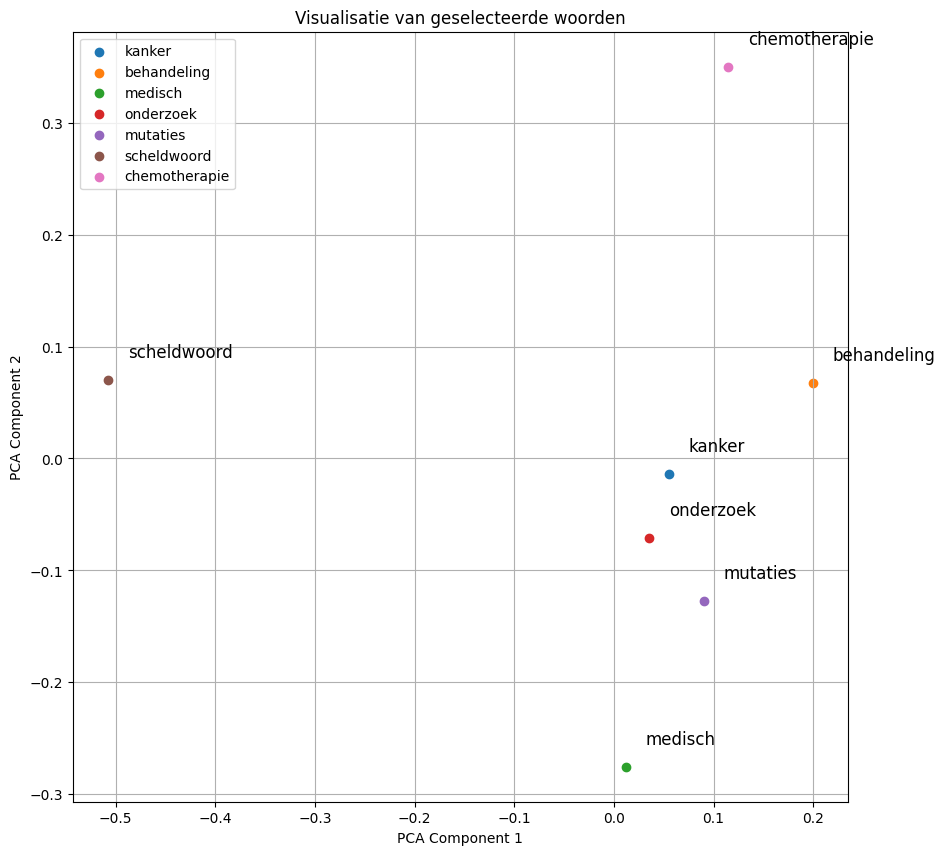

In [ ]:
# Plot de grafiek 
plt.figure(figsize=(10, 10))
for i, word in enumerate(selected_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word)
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
plt.title("Visualisatie van geselecteerde woorden")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()